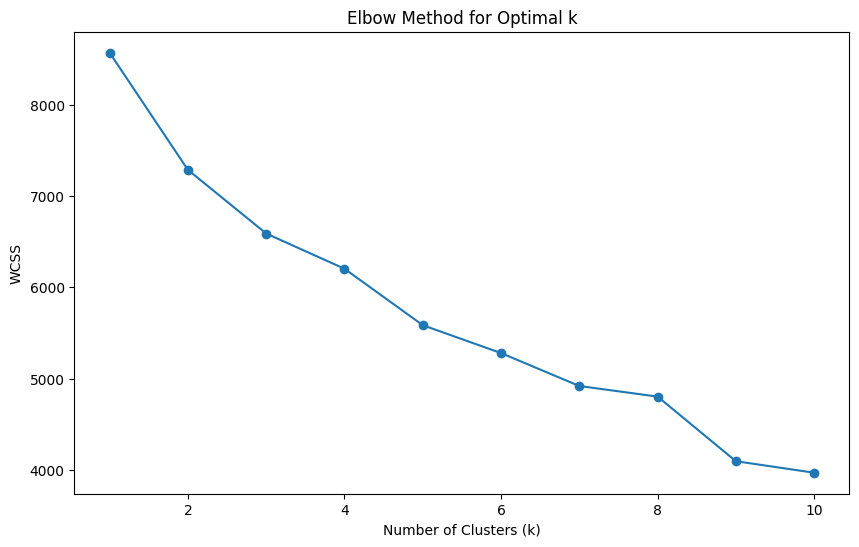

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Dataset
data = pd.read_csv('spo.csv')

# Pilih fitur untuk klasterisasi
features = ['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Ubah 'streams' ke numerik jika belum
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Hilangkan baris dengan nilai NaN pada fitur yang dipilih
data = data.dropna(subset=features)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Tentukan jumlah klaster optimal menggunakan Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Terapkan K-means dengan jumlah klaster optimal (misal k=4)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan label klaster ke dataset
data['Cluster'] = kmeans.labels_

Silhouette Score: 0.15


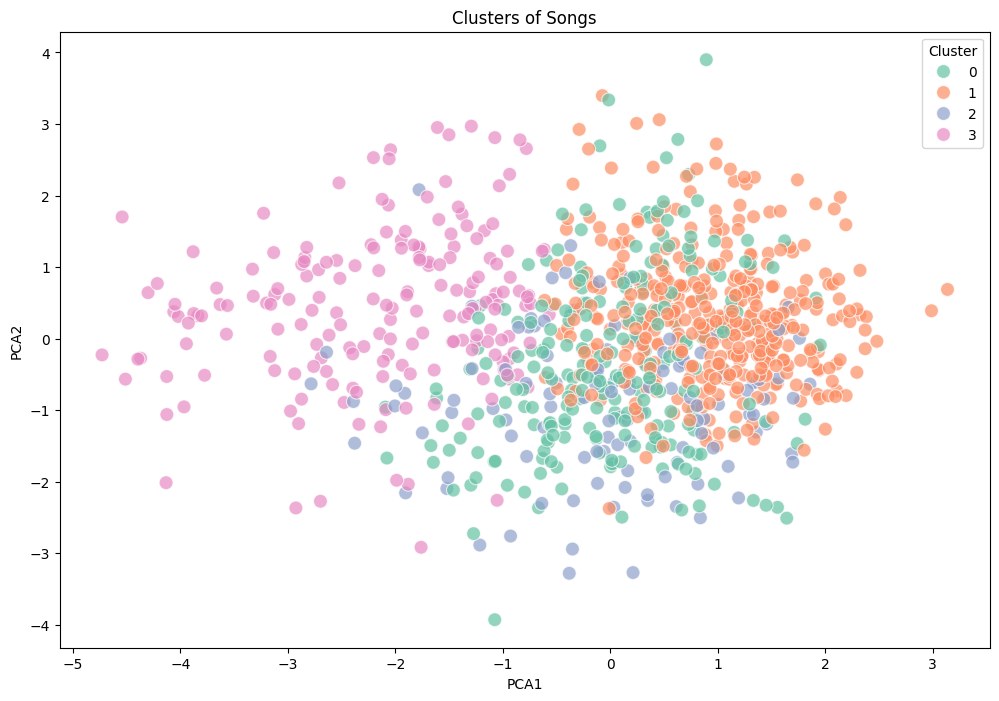

Cluster Summary:
              streams  danceability_%  valence_%   energy_%  acousticness_%  \
Cluster                                                                       
0        3.385787e+08       60.621849  45.046218  66.781513       17.113445   
1        3.083609e+08       76.550369  63.044226  71.508600       19.579853   
2        1.679401e+09       64.924370  51.453782  67.260504       17.428571   
3        4.442845e+08       55.632979  34.234043  43.547872       62.037234   

         instrumentalness_%  liveness_%  speechiness_%         bpm  
Cluster                                                             
0                  0.941176   20.865546      14.508403  148.680672  
1                  0.528256   18.410319       9.678133  111.294840  
2                  0.453782   16.588235       7.504202  118.773109  
3                  5.393617   15.462766       7.271277  116.244681  


In [ ]:
# Evaluasi model menggunakan Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score:.2f}')

# Visualisasi hasil klasterisasi menggunakan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100, alpha=0.7
)
plt.title('Clusters of Songs')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Ringkasan klaster
cluster_summary = data.groupby('Cluster')[features].mean()
print("Cluster Summary:")
print(cluster_summary)

# Simpan dataset dengan klaster
data.to_csv("clustered_songs.csv", index=False)